# Analisis Potensi Pasar untuk Kafe Robot di Los Angeles

## Konten <a id='back'></a>

* [Pendahuluan](#intro)
    * [Tujuan](#tujuan)
    * [Tahapan](#tahap)
* [Tahap 1: Memuat Data](#data)
    * [Memuat Library](#lib)
    * [Memuat Data](#data1)
* [Tahap 2: Eksplorasi data](#explore)
* [Tahap 3: Pra-pemrosesan data](#pra)
* [Tahap 4: Menganalisis Data](#analysis)
    * [Proporsi Berbagai Jenis Usaha](#analysis1)
    * [Proporsi Usaha Berbasis Waralaba dan Nonwaralaba RICE](#analysis2)
    * [Jenis Usaha yang Umumnya Berbasis Waralaba](#analysis3)
    * [Ciri-ciri dari Jenis Usaha Berbasis Waralaba](#analysis4)
    * [Jumlah Rata-rata Kursi di Setiap Jenis Usaha](#analysis5)
    * [10 Nama Jalan Teratas Berdasarkan Jumlah Usaha](#analysis6)
    * [Jumlah Jalan yang Hanya Memiliki Satu Usaha](#analysis7)
    * [Distribusi Jumlah Kursi dari Jenis Usaha yang Berada di Jalan Teratas](#analysis8)
* [Presentasi](#slides)
* [Kesimpulan Umum](#end)

## Pendahuluan <a id='intro'></a>

Proyek ini membahas tentang analisis data untuk usaha kafe kecil yang ingin dibuka di Los Angeles dengan memperkerjakan robot sebagai pelayan atau pramusaji. Kafe dengan konsep yang unik ini dianggap menjanjikan namun memerlukan modal yang besar dan dukungan dari investor yang tertarik dengan kondisi pasar saat ini.

Untuk mempersiapkan riset pasar, data dari sumber terbuka terkait jenis-jenis usaha tempat makan di LA akan digunakan sebagai dasar analisis data. Analisis data akan dilakukan untuk mengetahui potensi pasar terhadap kafe dengan konsep yang unik ini. Selain itu, faktor-faktor lain seperti persaingan di daerah tersebut juga akan dipertimbangkan dalam analisis data.

Dalam proyek ini, analisis data akan menjadi alat yang sangat penting dalam membantu para mitra menentukan keputusan bisnis yang tepat. Analisis data yang tepat dan akurat akan membantu mengurangi risiko kegagalan usaha dan meningkatkan peluang keberhasilan. Oleh karena itu, proyek ini sangat penting untuk dilakukan dengan cermat dan teliti. Dalam laporan ini, kami akan membahas langkah-langkah yang kami ambil dalam analisis data serta hasil dan rekomendasi untuk keberhasilan usaha kafe ini.

### Tujuan: <a id='tujuan'></a>

Tujuan analisis data dalam proyek ini adalah untuk mengidentifikasi potensi pasar terhadap kafe dengan konsep robot pelayan di Los Angeles. Analisis data juga bertujuan untuk mempertimbangkan faktor-faktor lain yang dapat mempengaruhi keberhasilan usaha kafe ini, seperti persaingan di daerah tersebut. Dengan melakukan analisis data yang tepat dan akurat, proyek ini diharapkan dapat membantu para mitra untuk membuat keputusan bisnis yang lebih baik dan mengurangi risiko kegagalan usaha.

### Tahapan: <a id='tahap'></a>
 
Proyek ini akan terdiri dari 4 tahap:

- Memuat data.
- Eksplorasi data.
- Pra-pemrosesan data.
- Menganalisis data.

## Tahap 1: Memuat Data <a id='data'></a>

### Memuat Library <a id='lib'></a>

In [47]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Memuat Data <a id='data1'></a>

In [48]:
# Memuat dataset
try:
    data = pd.read_csv('rest_data_us.csv')
except:
    data = pd.read_csv('/datasets/rest_data_us.csv') 

##  Tahap 2: Eksplorasi Data  <a id='explore'></a>

Dataset berisikan data terkait berbagai jenis usaha tempat makan di LA dengan kolom sebagai berikut:

- `ID` — ID unik untuk setiap usaha.
- `object_name` — Nama dari usaha tersebut.
- `chain` — Menunjukkan apakah usaha tersebut berbasis waralaba (TRUE/FALSE).
- `object_type` —  Jenis usaha tempat makan, misalnya Cafe, Restaurant, atau Fast Food.
- `address` — Alamat dari usaha tersebut.
- `number` — Jumlah kursi yang tersedia di usaha tersebut.

In [49]:
# Memeriksa 5 data teratas
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [50]:
# Melihat ukuran datasetnya
data.shape

(9651, 6)

In [51]:
# Melihat informasi umumnya
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [52]:
# Menghitung nilai yang hilang
data.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [53]:
# Memeriksa apakah ada data yang terduplikasi
data.duplicated().sum()

0

**Findings:**

Dari informasi di atas dapat dilihat bahwa ukuran datasetnya adalah sebesar **9651** baris dan **6** kolom. Setiap baris dalam tabel menyimpan informasi mengenai berbagai jenis usaha seperti ID, nama usaha, alamat, jenis usaha, jumlah kursi, dan apakah usaha tersebut berbasis waralaba atau bukan. Setelah diperiksa lebih lanjut, terdapat beberapa nilai yang hilang pada kolom `object_type` serta tipe data dari kolom `chain` yang belum sesuai dimana seharusnya adalah `boolean`.

## Tahap 3: Pra-pemrosesan Data <a id='pra'></a>

Sebelumnya telah ditemukan adanya nilai yang hilang, namun nilai yang hilang tersebut hanyalah sebagian kecil dari keseluruhan data yang ada. Untuk memastikannya perlu dihitung presentase nilai yang hilang terhadap keseluruhan datanya.

In [54]:
# Menghitung presentase nilai yang hilang
data.isna().sum() / data.shape[0] * 100

id             0.000000
object_name    0.000000
address        0.000000
chain          0.031085
object_type    0.000000
number         0.000000
dtype: float64

Dapat dilihat bahwan presentase nilai yang hilang hanyalah 0.03%, jumlah yang sangat kecil. Oleh karena itu, nilai yang hilang dapat diliangkan.

In [55]:
data = data.dropna().reset_index(drop=True)

Memastikan apakah masih ada nilai yang hilang:

In [56]:
# Memastikan nilai yang hilang
data.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

Nilai yang hilang telah berhasil diatasi.

Selanjutnya perlu dilakukan perubahan tipe datanya menjadi `boolean`:

In [57]:
# Merubah tipe datanya
data.chain = data.chain.astype(bool)

In [58]:
# Melihat kembali tipe datanya
data.dtypes

id              int64
object_name    object
address        object
chain            bool
object_type    object
number          int64
dtype: object

**Kesimpulan:**

- Nilai yang hilang hanyalah **0.03%** dari keseluruhan data sehingga nilai yang hilang bisa diatasi degan cara menghapusnya.
- Tipe data dari kolom `chain` dirubah dari `object` menjadii `bool`.

## Tahap 4: Menganalisis Data <a id='analysis'></a>

### Proporsi Berbagai Jenis Usaha <a id='analysis1'></a>

Hal pertama yang akan dianalisa adalah proporsi dari berbagai jenis usaha.

Mari lihat kembali datasetnya terlebih dahulu:

In [59]:
# Melihat kembali datanya
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [60]:
# Melihat jenis usaha
data.object_type.unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

Terdapat **6** jenis usaha, yaitu `Cafe`, `Restaurant`, `Fast Food`, `Bakery`, `Bar`, dan `Pizza`.

Selanjutnya, menghitung jumlah usaha dari masing-masing jenis usaha:

In [61]:
# Menghitung jumlah usaha dari masing-masing jenis usaha
grouped_data = data.groupby('object_type').count()
grouped_data.reset_index(inplace=True)
grouped_data[['object_type', 'id']]

,object_type,id
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,319
5,Restaurant,7253


Semua usaha yang ada telah dihitung berdasarkan jenisnya, selanjutnya mari visualisasikan datanya:

In [62]:
# Membuat barchart
fig = px.bar(grouped_data, x='object_type', y='id', 
             labels={'id':'Jumlah', 'object_type':'Jenis Usaha'}, 
             title='Proporsi Berbagai Jenis Usaha di LA',
             template= 'plotly_white',
             text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [63]:
# Membuat piechart
fig = px.pie(grouped_data, names='object_type', values='id', 
             labels={'id':'Jumlah', 'object_type':'Jenis Usaha'}, 
             title='Proporsi Berbagai Jenis Usaha di LA',
             template= 'plotly_white')
fig.show()

**Findings:**

- `Restaurant` merupakan jenis usaha yang paling umum dengan proporsi sebesar **75.2%** atau sebanyak **7253** unit usaha.
- Sebaliknya, `Bakery` merupakan jenis usaha yang paling kecil porsinya yaitu hanya sebesar **2.93%** atau sebanyak **283** unit saja.
- `Cafe` menempati urutan ketiga dengan porsi **4.51%** atau sebanyak **435** unit usaha. 

**Insights:**

- Proporsi suatu jenis usaha dapat dijadikan pertimbangan dalam pemilihan jenis usaha yang tepat, semakin besar suatu proporsi jenis usaha maka semakin besar pula persaingannya.
- `Cafe` merupakan jenis usaha yang populer ketiga, namun proporsinya jauh lebih kecil dibandingkan dengan jenis usaha populer pertama dan kedua, artinya persaingan `Cafe` di LA tidak terlalu ketat.

**Recomendation:**

- Sebelum membuka usaha, alangkah baiknya memperhatikan proporsi dari setiap jenis usaha.

### Proporsi Usaha Berbasis Waralaba dan Nonwaralaba <a id='analysis2'></a>

Selanjutnya menghitung proporsi usaha yang berbasis waralaba dan nonwaralaba dengan cara menghitung nilai dari kolom `chain`.

In [64]:
# Menghitung usaha berbasis waralaba dan nonwaralaba
chain = data.groupby('chain').count()
chain.reset_index(inplace=True)
chain[['chain', 'id']]

,chain,id
0,False,5972
1,True,3676


Setelah dihitung, mari lihat visualisasi datanya:

In [65]:
# Membuat barchart
fig = px.bar(chain, x='chain', y='id', 
             labels={'id':'Jumlah', 'chain':'Waralaba'}, 
             title='Proporsi Usaha Berbasis Waralaba dan Nonwaralaba di LA',
             template= 'plotly_white',
             text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [66]:
# Membuat piechart
fig = px.pie(chain, names='chain', values='id', 
             labels={'id':'Jumlah', 'chain':'Waralaba'}, 
             title='Proporsi Usaha Berbasis Waralaba dan Nonwaralaba di LA',
             template= 'plotly_white')
fig.show()

**Findings:**

Jenis usaha yang berbasis waralaba jauh lebih sedikit dibandingkan jenis usaha yang berbasis nonwaralaba dengan presentase waralaba hanya sebesar **38.1%** atau sebesar **3676** unit usaha, sedangkan nonwaralaba sebesar **61.9%** atau **5972** unit usaha.

### Jenis Usaha yang Umumnya Berbasis Waralaba <a id='analysis3'></a>

Untuk mencari tahu jenis usaha apa saja yang umumnya merupakan usaha berbasis waralaba, perlu mencari tahu rasio dari tiap jenis usaha yang berbasis waralaba terhadap keseluruhan toko di tiap jenisnya. Namun sebelumnya mari melihat kembali dataset awalnya:

In [67]:
# Melihat kembali datasetnya
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Menampilkan grafik yang menunjukan jumlah waralaba dan nonwaralaba tiap jenis usaha:

In [68]:
# Membuat grafik waralaba tiap jenis usaha
fig = px.histogram(data, x='object_type', y='chain',
             color='chain', barmode='group',
             histfunc='count',
             labels={'object_type':'Jenis Usaha', 'chain':'Waralaba'}, 
             title='Jenis Usaha Berbasis Waralaba dan Nonwaralaba di LA',
             template= 'plotly_white',
             text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

`Restaurant` memiliki jumlah paling banyak, namun rasio yang berbasis waralaba tidak sampai setengahnya, untuk memastikan rasio dari masing-masing jenis usaha akan dibuatkan `pivot-table` yang akan menghitung jumlah waralaba dan non waralaba tiap jesnis usaha dan kemudian rasionya akan dihitung berdasarkan `pivot_table` tersebut.

In [69]:
# Membuat pivot_table
object_chain = pd.pivot_table(data, values='object_name',
                              index='object_type', columns=['chain'], 
                              aggfunc='count').fillna(0)
object_chain

chain,False,True
object_type,,
Bakery,0.0,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,166.0,153.0
Restaurant,4961.0,2292.0


Menghitung rasio dengan cara membagi jumlah jenis usaha yang memiliki waralaba dengan keseluruhan toko di tiap jenisnya.

In [70]:
# Menghitung rasio
object_chain['ratio'] = object_chain[True] / (object_chain[True] + object_chain[False]) * 100
object_chain.reset_index(inplace=True)
object_chain

chain,object_type,False,True,ratio
0,Bakery,0.0,283.0,100.000000
1,Bar,215.0,77.0,26.369863
2,Cafe,169.0,266.0,61.149425
3,Fast Food,461.0,605.0,56.754221
4,Pizza,166.0,153.0,47.962382
5,Restaurant,4961.0,2292.0,31.600717


Dapat dilihat bahwa usaha `Bakery` memiliki rasio berbasis waralaba yang mencapai **100%**. Mari tampilkan datanya dalam bentuk grafik:

In [71]:
# Membuat grafik rasio
fig = px.bar(object_chain, x='object_type', y='ratio', 
             labels={'object_type':'Jenis Usaha'}, 
             title='Raiso Jenis Usaha Berbasis Waralaba di LA',
             template= 'plotly_white',
             text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

**Findings:**

- Berdasarkan data di atas, `Bakery` merupakan jenis usaha yang seluruhnya berbasis waralaba.
- `Cafe` memiliki proporsi usaha berbasis waralaba sebesar **61%**.
- Meski `Resturant` memiliki jumlah yang paling banyak, namun rasionya tidak sampai setengahnya yaitu hanya **32%**.

### Ciri-ciri dari Jenis Usaha Berbasis Waralaba <a id='analysis4'></a>

Mencari tahu ciri-ciri dari jenis usaha yang berbasis waralaba, dalam hal ini adalah dengan cara menghitung distribusi dari jumlah kurisinya. Hal pertama yang dilakukan adalah memfilter datanya dimana kolom `chain` adalah `True`.

In [72]:
# Memfilter datanya
data_chain = data[data.chain == True]
data_chain.head()

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26


Menghitung jumlah kursi di setiap unit usaha:

In [73]:
# Menghitung jumlah kursi
data_chain.object_name.value_counts().head()

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
Name: object_name, dtype: int64

Jumlah kursi dari masing-masing unit usaha telah dihitung, selanjutnya mari melihat visualisasi datanya menggunakan grafik distribusi:

<Figure size 1800x1400 with 0 Axes>

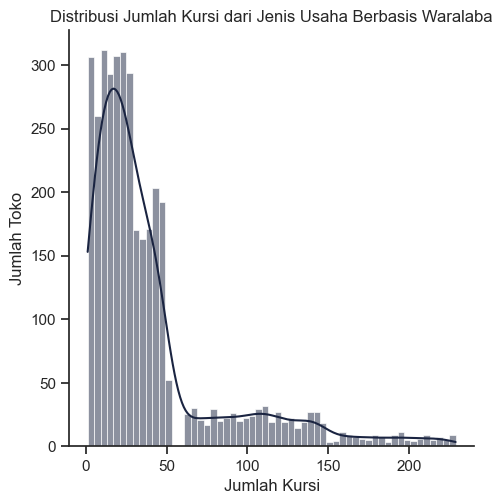

In [74]:
# Membuat grafik distribusinya
sns.set_theme(style='ticks', palette='cubehelix')
plt.figure(figsize=(18,14))
sns.displot(data_chain.number, kde=True)
plt.title('Distribusi Jumlah Kursi dari Jenis Usaha Berbasis Waralaba')
plt.xlabel('Jumlah Kursi')
plt.ylabel('Jumlah Toko')
plt.show()

In [75]:
less_50 = data_chain[data_chain.number <= 50].shape[0]
print('Jumlah waralaba dengan kursi kurang dari 50: ', less_50)

more_50 = data_chain[data_chain.number >= 50].shape[0]
print('Jumlah waralaba dengan kursi lebih dari 50: ', more_50)

Jumlah waralaba dengan kursi kurang dari 50:  3033
Jumlah waralaba dengan kursi lebih dari 50:  643


**Findings:**

Waralaba yang meyediakan lebih dari 50 kursi tidak sebanyak waralaba yaitu hanya sebanyak **643** unit usaha, sedangkan waralaba yang menyediakan kurang dari 50 kursi adalah sebanyak **3033** unit usaha, jumlah yang sangat timpang.

### Jumlah Rata-rata Kursi di Setiap Jenis Usaha <a id='analysis5'></a>

Setelah melihat distribusi jumlah kursi dari jenis usaha yang berbasis waralaba, selanjutnya kita akan mencari tahu jumlah rata-tata kursi di setiap jenis usaha.

In [76]:
# Melihat kembali datanya
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Jumlah kursi rata-rata akan dihitung menggunakan dataset `data`, dan melakukan visualisasi menggunakan `histogram` dari `plotly`.

In [77]:
# Membuat grafik rata-rata kursi di setiap jenis usaha
fig = px.histogram(data, x='object_type', y='number',
             histfunc='avg',
             labels={'object_type':'Jenis Usaha', 'number':'chair'}, 
             title='Rata-rata Kursi di Setiap Jenis Usaha di LA',
             template= 'plotly_white',
             text_auto='.2s')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

**Findings:**

- Jumlah kursi rata-rata dari usaha `Cafe` adalah **25** kursi.
- Jumlah kursi rata-rata dari usaha `Restaurant` adalah **48** kursi.
- Jumlah kursi rata-rata dari usaha `Fast Food` adalah **32** kursi.
- Jumlah kursi rata-rata dari usaha `Bakery` adalah **22** kursi.
- Jumlah kursi rata-rata dari usaha `Bar` adalah **45** kursi.
- Jumlah kursi rata-rata dari usaha `Pizza` adalah **29** kursi.

### 10 Nama Jalan Teratas Berdasarkan Jumlah Usaha <a id='analysis6'></a>

Selanjutnya mencari tahu sepuluh nama jalan teratas berdasarkan jumlah usaha yang ada di jalan tersebut.

In [78]:
# Melihat kembali datanya
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Untuk mengetahui sepuluh nama jalan teratas, perlu dilakukann pemfilteran alamat setiap usaha yang ada sehingga hanya menyisakan nama jalannya saja tanpa ada nomor unitnya.

In [79]:
# Memfilter data
address = data.address.apply(lambda x: ' '.join(x.split(' ')[1:])).to_frame()
address['count'] = 1
address.head()

,address,count
0,N EAGLE ROCK BLVD,1
1,WORLD WAY # 120,1
2,HOLLYWOOD BLVD # 253,1
3,W SUNSET BLVD,1
4,ECHO PARK AVE,1


Kemudian dilakukan penghitungan nama jalan dan mengurutkannya secara menurun, selanjutnya hanya 10 data teratas saja yang akan digunakan datanya.

In [80]:
# Menghitung data
top_address = address.groupby('address').sum().sort_values(by='count', ascending=False)

# Mengambil top 10
top_address = top_address.head(10).reset_index()
top_address

,address,count
0,W SUNSET BLVD,296
1,W PICO BLVD,288
2,HOLLYWOOD BLVD,167
3,WILSHIRE BLVD,161
4,S VERMONT AVE,148
5,SANTA MONICA BLVD,146
6,W 3RD ST,145
7,BEVERLY BLVD,135
8,S FIGUEROA ST,134
9,MELROSE AVE,128


10 nama jalan teratas berhasil didapatkan.

Mari melihat visualisasi datanya:

In [81]:
# Membuat visualisasi datanya
fig = px.bar(top_address, x='address', y='count',
             labels={'address':'Nama Jalan', 'count':'Jumlah Usaha'}, 
             title='Sepuluh Nama Jalan Teratas Berdasarkan Jumlah Usaha',
             template= 'plotly_white',
             text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

**Findings:**

`W SUNSET BLVD` menjadi jalan yang paling ramai dijadiikan sebagai tempat untuk membuka usaha yaitu sekitar **296** unit usaha. Disusul `W PICO BLVD` sebanyak **288** unit usaha dan `HOLLYWOOD BLVD` sebanyak **167** unit usaha.

**Insights:**

Jumlah unit usaha dapat dijadikan acuan untuk membuka usaha baru, apakah sudah banyak unit usaha yang ada yang artinya dapat menjadi potensi persaingan atau justru masih terhitung sedikit. Namun perlu diperhatikan juga apakah ***trafic*** di jalan tersebut cukup ramai atau justru sebaliknya.

**Recomendation:**

Alangkah baiknya untuk memperhatikan jumlah unit usaha yang ada sebelum membuka usaha di tempat tersebut.

### Jumlah Jalan yang Hanya Memiliki Satu Usaha <a id='analysis7'></a>

Sebelumnya kita telah mencari tahu 10 nama jalan teratas berdasarkan jumlah usaha yang ada di jalan tersebut, selanjutnya kita akan mencari tahu jumlah jalan yang hanya memiliki satu usaha saja.

In [82]:
# Memfilter data
address_filtered = address.groupby('address').sum().sort_values(by='count', ascending=False)

# Menghitung jumlah jalan
print('Jalan yang hanya memiliki satu usaha adalah sebanyak', 
      address_filtered[address_filtered['count'] == 1].shape[0])

Jalan yang hanya memiliki satu usaha adalah sebanyak 2481


**Findings:**

Ternyata terdapat **2481** jalan yang hanya memiliki satu unit usaha, nilai yang cukup besar.

### Distribusi Jumlah Kursi dari Jenis Usaha yang Berada di Jalan Teratas <a id='analysis8'></a>

Seperti yang telah diketahui sebelumnya, nama jalan yang memiliki paling banyak usaha adalah `W SUNSET BLVD`. Oleh karena itu akan dilakukan analisa mengenai distribusi jumlah kursi di jalan tersebut.

In [83]:
# Memfilter data
address_filtered_2 = data[data.address.str.contains('W SUNSET BLVD')].reset_index(drop=True)
address_filtered_2.head()

,id,object_name,address,chain,object_type,number
0,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
1,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
2,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
3,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118
4,11819,ONO HAWAIIAN BBQ,5539 W SUNSET BLVD,True,Restaurant,35


<Figure size 1800x1400 with 0 Axes>

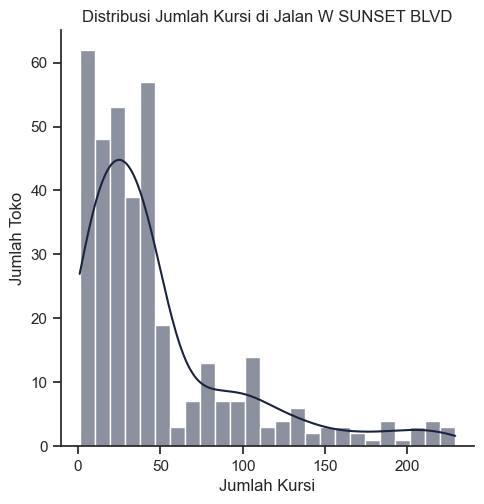

In [84]:
# Membuat grafiknya
plt.figure(figsize=(18,14))
sns.displot(address_filtered_2.number, kde=True)
plt.title('Distribusi Jumlah Kursi di Jalan W SUNSET BLVD')
plt.xlabel('Jumlah Kursi')
plt.ylabel('Jumlah Toko')
plt.show()

In [85]:
less_50 = address_filtered_2[address_filtered_2.number <= 50].shape[0]
print('Jumlah waralaba dengan kursi kurang dari 50: ', less_50)

more_50 = address_filtered_2[address_filtered_2.number >= 50].shape[0]
print('Jumlah waralaba dengan kursi lebih dari 50: ', more_50)

Jumlah waralaba dengan kursi kurang dari 50:  278
Jumlah waralaba dengan kursi lebih dari 50:  90


**Findings:**

Unit usaha yang berada di jalan `W SUNSET BLVD` yang meyediakan lebih dari 50 kursi tidak sebanyak waralaba yaitu hanya sebanyak **90** unit usaha, sedangkan waralaba yang menyediakan kurang dari 50 kursi adalah sebanyak **278** unit usaha.

## Presentasi <a id='slides'></a>


File presentasi dapat dilihat di disi: [Google Drive](https://drive.google.com/file/d/1Yul1cqn3qfMJ49LOneMj9gbLNKTChE4e/view?usp=share_link)

## Kesimpulan Umum <a id='end'></a>

Dataset tersebut berisi informasi terkait berbagai jenis usaha tempat makan di Los Angeles. Setiap baris pada dataset merepresentasikan satu usaha dan terdapat 6 kolom yang memberikan informasi tentang usaha tersebut, yaitu:

- `ID` — ID unik untuk setiap usaha.
- `object_name` — Nama dari usaha tersebut.
- `chain` — Menunjukkan apakah usaha tersebut berbasis waralaba (TRUE/FALSE).
- `object_type` —  Jenis usaha tempat makan, misalnya Cafe, Restaurant, atau Fast Food.
- `address` — Alamat dari usaha tersebut.
- `number` — Jumlah kursi yang tersedia di usaha tersebut.

Dataset ini dapat digunakan untuk melakukan analisis terkait jenis-jenis usaha tempat makan di Los Angeles dan informasi seperti jumlah kursi yang tersedia dapat digunakan untuk memperkirakan kapasitas usaha tersebut. Selain itu, informasi tentang jenis usaha dapat digunakan untuk membandingkan persaingan antara jenis-jenis usaha tempat makan yang ada di Los Angeles.

Tujuan analisis data dalam proyek ini adalah untuk mengidentifikasi potensi pasar terhadap kafe dengan konsep robot pelayan di Los Angeles. Analisis data juga bertujuan untuk mempertimbangkan faktor-faktor lain yang dapat mempengaruhi keberhasilan usaha kafe ini, seperti persaingan di daerah tersebut. Dengan melakukan analisis data yang tepat dan akurat, proyek ini diharapkan dapat membantu para mitra untuk membuat keputusan bisnis yang lebih baik dan mengurangi risiko kegagalan usaha.

Setelah menganalisis datanya, dapat disimpulkan bahwa:

1. Proporsi berbagai jenis usaha:

    Findings:

    - `Restaurant` merupakan jenis usaha yang paling umum dengan proporsi sebesar **75.2%** atau sebanyak **7253** unit usaha.
    - Sebaliknya, `Bakery` merupakan jenis usaha yang paling kecil porsinya yaitu hanya sebesar **2.93%** atau sebanyak **283** unit saja.
    - `Cafe` menempati urutan ketiga dengan porsi **4.51%** atau sebanyak **435** unit usaha. 
    
    Dapat dilihat bahwa jenis usaha `Cafe` memiliki porsi sekitar **4.51%** atau sebanyak **435** unit usaha di Los Angeles. Hal ini menunjukkan bahwa pasar kafe di Los Angeles masih cukup potensial dan masih ada peluang untuk memasuki pasar tersebut. Namun, perlu diperhatikan bahwa persaingan di pasar kafe juga cukup tinggi karena terdapat banyak usaha Cafe di Los Angeles.
    
2. Proporsi usaha berbasis waralaba dan nonwaralaba:

    Findings:

    - Jenis usaha yang berbasis waralaba jauh lebih sedikit dibandingkan jenis usaha yang berbasis nonwaralaba dengan presentase waralaba hanya sebesar **38.1%** atau sebesar **3676** unit usaha, sedangkan nonwaralaba sebesar **61.9%** atau **5972** unit usaha.

         

3. Jenis usaha yang umumnya berbasis waralaba:

    Findings:

    - Berdasarkan data di atas, `Bakery` merupakan jenis usaha yang seluruhnya berbasis waralaba.
    - `Cafe` memiliki proporsi usaha berbasis waralaba sebesar **61%**.
    - Meski `Resturant` memiliki jumlah yang paling banyak, namun rasionya tidak sampai setengahnya yaitu hanya **32%**.

    Berdasarkan hasil analisis tersebut, jika ingin membuka usaha `Cafe`, sebaiknya dilakukan pengecekan terhadap proporsi usaha berbasis waralaba di sekitar daerah yang dituju. Jika mayoritas usaha `Cafe` berbasis waralaba, maka mempertimbangkan untuk membuka usaha `Cafe` berbasis waralaba. Namun, jika mayoritas usaha `Cafe` berbasis non-waralaba, maka mempertimbangkan untuk membuka usaha `Cafe` non-waralaba.

4. Ciri-ciri dari jenis usaha berbasis waralaba:

    Findings:

    - Waralaba yang meyediakan lebih dari 50 kursi tidak sebanyak waralaba yaitu hanya sebanyak **643** unit usaha, sedangkan waralaba yang menyediakan kurang dari 50 kursi adalah sebanyak **3033** unit usaha, jumlah yang sangat timpang.

    Berdasarkan informasi di atas, dapat disimpulkan bahwa mayoritas waralaba lebih condong menyediakan tempat duduk kurang dari 50 kursi. Jadi, jika ingin membuka usaha `Cafe` dengan model waralaba, sebaiknya mempertimbangkan untuk menyediakan kurang dari 50 kursi agar sesuai dengan mayoritas usaha waralaba di wilayah tersebut.

5. Jumlah rata-rata kursi di setiap jenis usaha:

    Findings:

    - Jumlah kursi rata-rata dari usaha `Cafe` adalah **25** kursi.
    - Jumlah kursi rata-rata dari usaha `Restaurant` adalah **48** kursi.
    - Jumlah kursi rata-rata dari usaha `Fast Food` adalah **32** kursi.
    - Jumlah kursi rata-rata dari usaha `Bakery` adalah **22** kursi.
    - Jumlah kursi rata-rata dari usaha `Bar` adalah **45** kursi.
    - Jumlah kursi rata-rata dari usaha `Pizza` adalah **29** kursi.

    Jika ingin membuka usaha `Cafe` maka dapat dianalisis bahwa jumlah kursi rata-rata dari usaha `Cafe` adalah **25** kursi. Hal ini dapat menjadi acuan untuk menentukan ukuran lokasi dan kapasitas tempat duduk yang sesuai dengan jenis usaha `Cafe`. Selain itu, dapat juga dilakukan perbandingan dengan rata-rata jumlah kursi dari jenis usaha lainnya untuk melihat apakah jumlah kursi `Cafe` sudah sesuai atau masih perlu diatur ulang.

6. Sepuluh nama jalan teratas berdasarkan jumlah usaha:

    Findings:

    - `W SUNSET BLVD` menjadi jalan yang paling ramai dijadiikan sebagai tempat untuk membuka usaha yaitu sekitar **296** unit usaha. Disusul `W PICO BLVD` sebanyak **288** unit usaha dan `HOLLYWOOD BLVD` sebanyak **167** unit usaha.

    Jika ingin membuka `Cafe` di salah satu jalan tersebut, kita bisa mengambil kesimpulan bahwa jalan-jalan tersebut memiliki potensi yang baik untuk bisnis kafe karena banyaknya jumlah usaha yang telah berdiri di sana. Namun, sebelum memutuskan untuk membuka kafe di salah satu jalan tersebut, perlu juga diperhatikan faktor lain seperti lokasi persaingan, target pasar, dan potensi keuntungan yang dapat diperoleh.

7. Jumlah jalan yang hanya memiliki satu usaha:

    Findings:

    - Terdapat **2481** jalan yang hanya memiliki satu unit usaha.

    Berdasarkan informasi tersebut, kita dapat menyimpulkan bahwa ada banyak pilihan jalan yang mungkin tidak terlalu ramai dan hanya memiliki satu usaha di sepanjangnya. Hal ini dapat menjadi peluang jika ingin membuka usaha `Cafe` dengan memilih lokasi yang kurang ramai namun potensial. Namun, perlu juga diperhatikan bahwa lokasi yang terlalu sepi juga dapat menjadi tantangan dalam hal pemasaran dan menarik pelanggan. Oleh karena itu, sebelum memilih jalan tertentu, sebaiknya lakukan analisis pasar terlebih dahulu untuk mengetahui potensi pasar di lokasi tersebut.

8. Distribusi jumlah kursi dari jenis usaha yang berada di jalan teratas:

    Findings:

    - Unit usaha yang berada di jalan `W SUNSET BLVD` yang meyediakan lebih dari 50 kursi tidak sebanyak waralaba yaitu hanya sebanyak **90** unit usaha, sedangkan waralaba yang menyediakan kurang dari 50 kursi adalah sebanyak **278** unit usaha.

    Berdasarkan temuan tersebut, jika ingin membuka kafe di jalan `W SUNSET BLVD`, ada baiknya untuk mempertimbangkan kapasitas tempat yang tidak terlalu besar, yaitu sekitar kurang dari **50** kursi. Hal ini disebabkan karena jumlah unit usaha yang menyediakan lebih dari **50** kursi tidak begitu banyak di jalan tersebut, hanya sekitar **90** unit. Selain itu, dengan mempertimbangkan kapasitas tempat yang tidak terlalu besar, dapat membantu dalam mengatur biaya operasional seperti sewa tempat dan pengeluaran lainnya. Namun demikian, keputusan akhir mengenai kapasitas tempat haruslah disesuaikan dengan kondisi pasar dan segmentasi target pasar yang diinginkan.

[Kembali ke Daftar Isi](#back)